<a href="https://colab.research.google.com/github/pikanaeri/plm-model-comparison/blob/main/phrog-performance/Classifier_Performance_Boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
tmvec = pd.read_csv('/content/drive/MyDrive/outputs_01082023/tmvec_embeddings_phrog/5CV_report.csv')
carp_640M = pd.read_csv('/content/drive/MyDrive/outputs_01082023/carp_640M_embeddings_phrog/5CV_report.csv')
esm2 = pd.read_csv('/content/drive/MyDrive/outputs_01082023/esm2_embeddings_phrog/5CV_report.csv')
prostt5 = pd.read_csv('/content/drive/MyDrive/outputs_01082023/prostt5_embeddings_phrog/5CV_report.csv')
prott5 = pd.read_csv('/content/drive/MyDrive/outputs_01082023/prott5_xl_embeddings_phrog/5CV_report.csv')

tmvec.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
carp_640M.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
esm2.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
prostt5.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)
prott5.rename(columns={'Unnamed: 0':'PHROG Category'}, inplace=True)

In [ ]:
tmvec['study'] = 'TMVec'
carp_640M['study'] = 'CARP_640M'
esm2['study'] = 'Esm2_t30_150M_UR50D'
prostt5['study'] = 'ProstT5'
prott5['study'] = 'ProtT5_XL_Uniref50'

In [ ]:
cats = ['DNA, RNA and nucleotide metabolism',
        'connector',
        'head and packaging',
        'integration and excision',
        'lysis',
        'moron, auxiliary metabolic gene and host takeover',
        'other',
        'tail',
        'transcription regulation',
       ]

In [ ]:
esm2 = esm2[esm2['PHROG Category'].isin(cats)]
prostt5 = prostt5[prostt5['PHROG Category'].isin(cats)]
tmvec = tmvec[tmvec['PHROG Category'].isin(cats)]
carp_640M = carp_640M[carp_640M['PHROG Category'].isin(cats)]
prott5 = prott5[prott5['PHROG Category'].isin(cats)]

In [ ]:
import textwrap
import matplotlib.pyplot as plt
max_width = 17

In [ ]:
plt.rcParams["figure.figsize"] = (16,10)
plt.rcParams['font.size'] = 16

In [ ]:
df = pd.concat([esm2, prostt5, tmvec, carp_640M, prott5])


<ipython-input-11-3411492b3578>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
<ipython-input-11-3411492b3578>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())


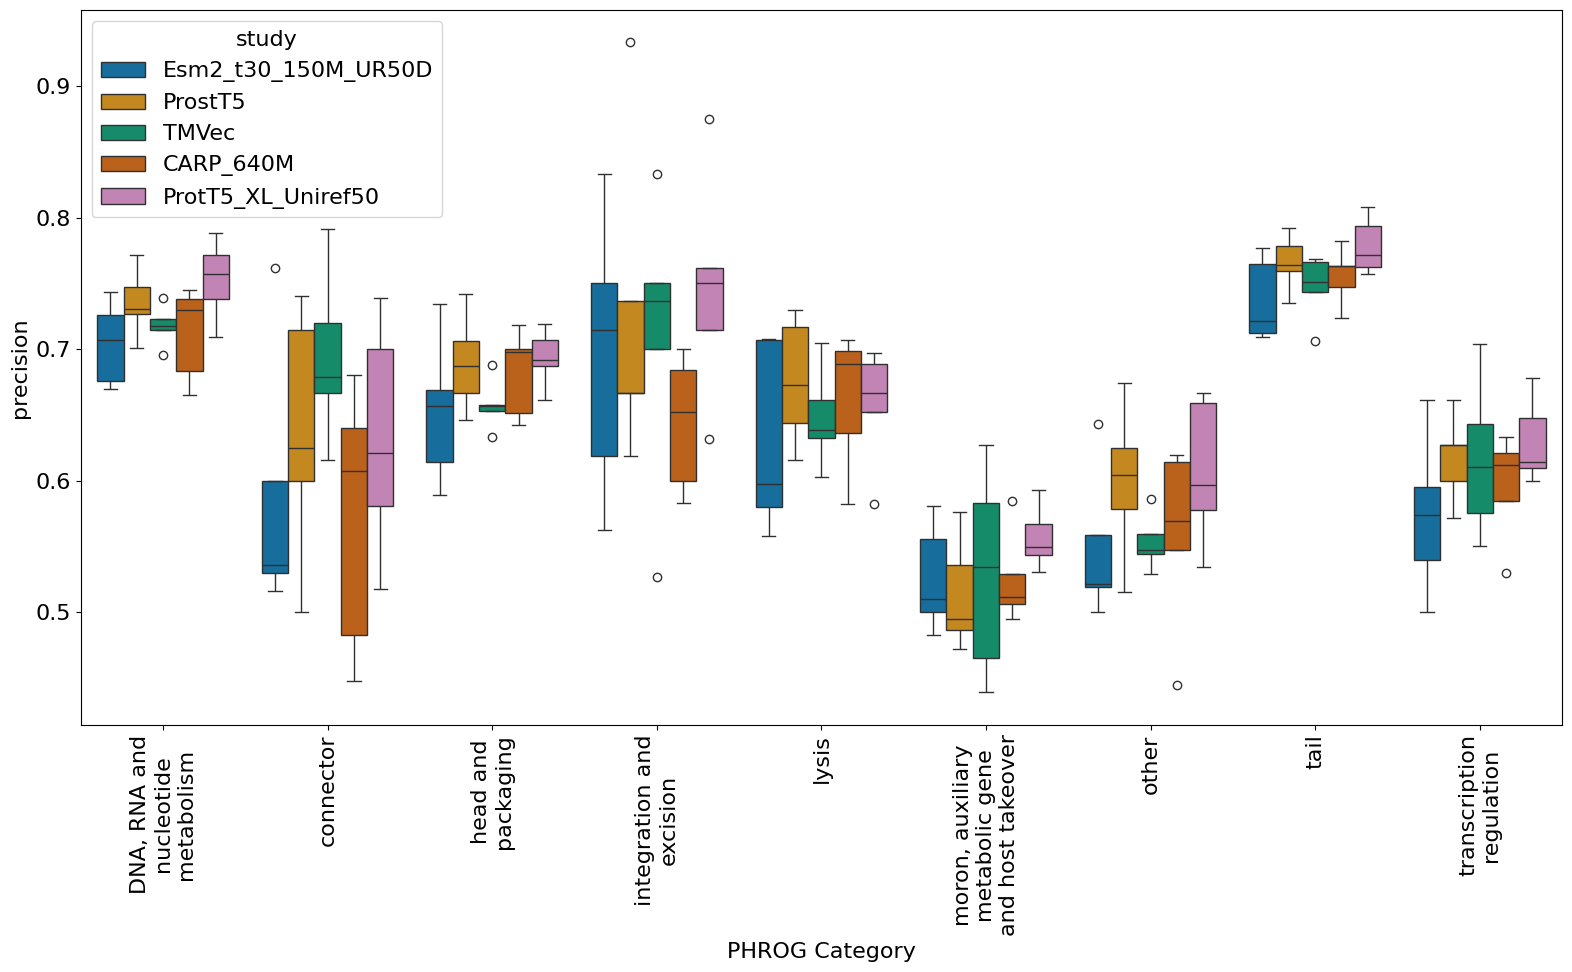

In [ ]:
ax = sns.boxplot(
    y='precision',
    x='PHROG Category',
    hue='study',
    palette='colorblind',
    data=df
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

plt.tight_layout()
plt.savefig('plm_performance_comparison_precision.png', dpi=300)


<ipython-input-12-cfbbcc61e1f7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
<ipython-input-12-cfbbcc61e1f7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())


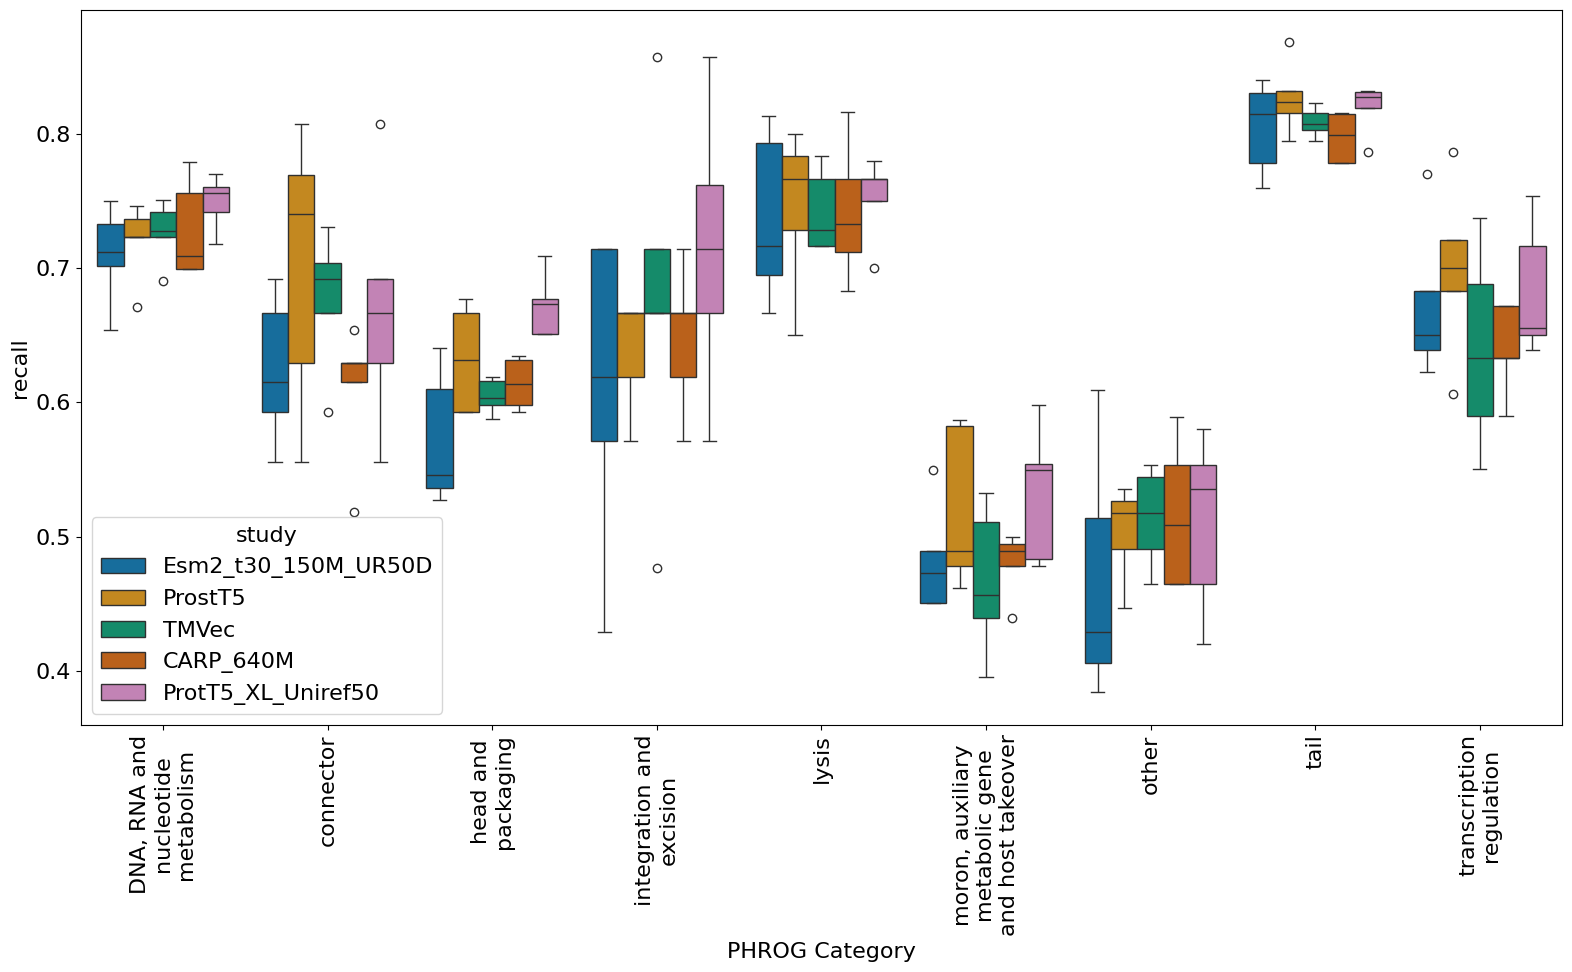

In [ ]:
ax = sns.boxplot(
    y='recall',
    x='PHROG Category',
    hue='study',
    palette='colorblind',
    data=df
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

plt.tight_layout()
plt.savefig('plm_performance_comparison_recall.png', dpi=300)

### F1

In [ ]:
f1 = []
for r in df.iterrows():
    f1.append(2 * ((r[1]['recall'] * r[1]['precision']) / (r[1]['recall'] + r[1]['precision'])))

In [ ]:
df['F1 Score'] = f1

<ipython-input-15-f8d725450fd5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
<ipython-input-15-f8d725450fd5>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())


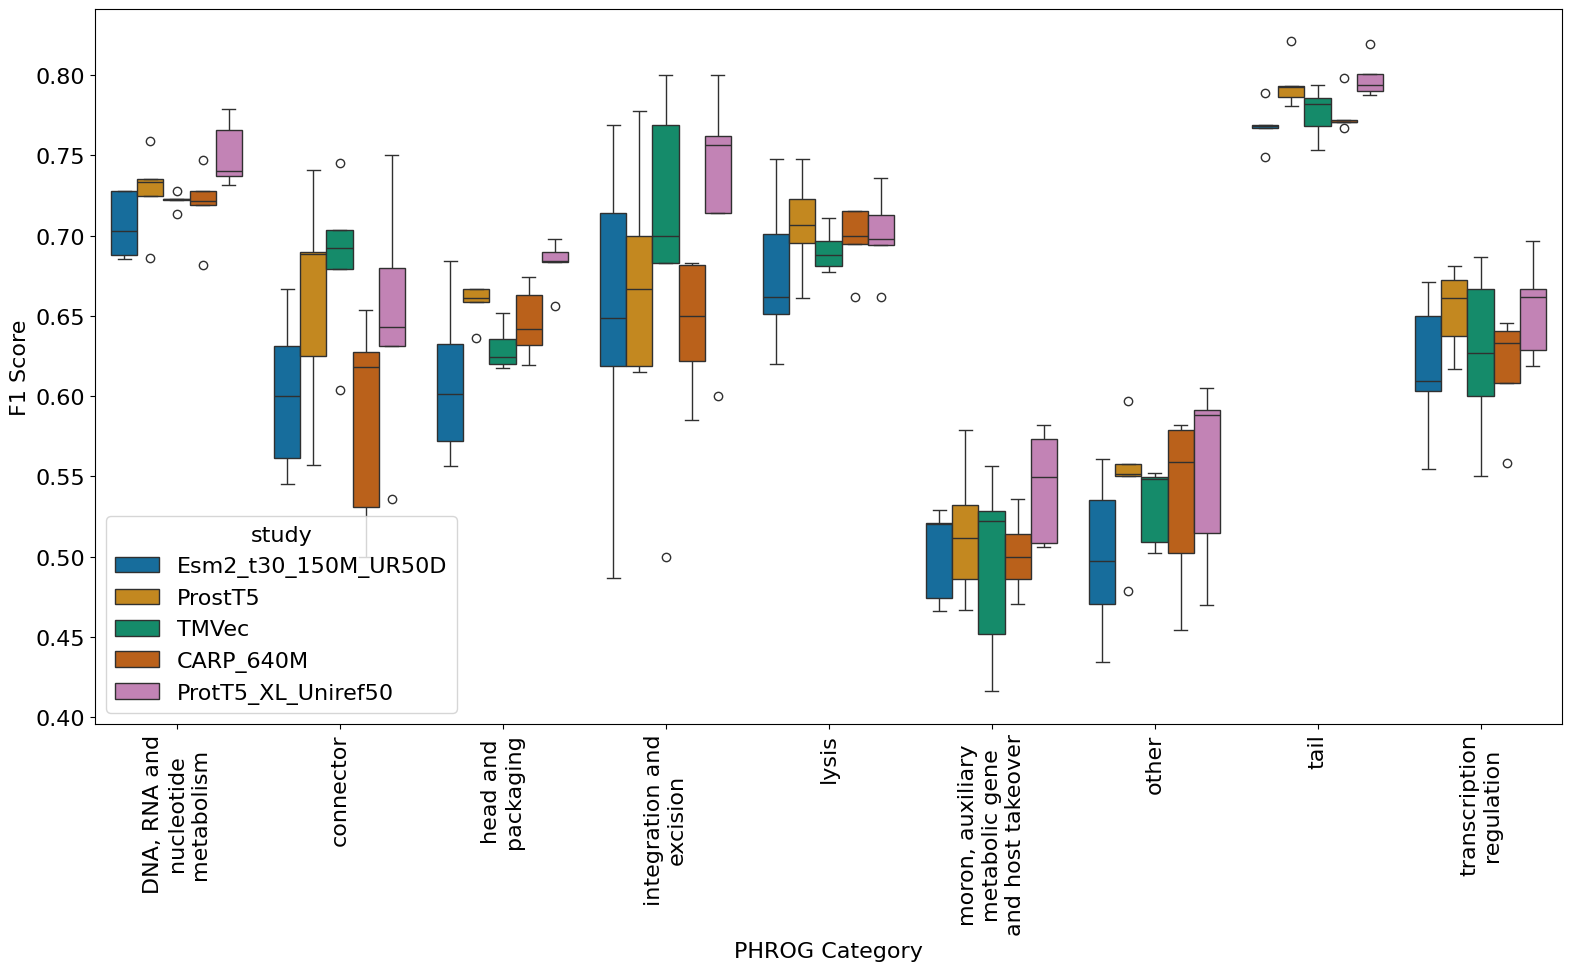

In [ ]:
ax = sns.boxplot(
    y='F1 Score',
    x='PHROG Category',
    hue='study',
    palette='colorblind',
    data=df
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xticklabels(textwrap.fill(x.get_text(), max_width) for x in ax.get_xticklabels())

plt.tight_layout()
plt.savefig('plm_performance_comparison_f1.png', dpi=300)